# Математические пакеты
## Лабораторная работа 2 Дискретное преобразование Фурье
Выполнил студент гр. 9381 Гурин Семен
### Цель работы
практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.
### Задачи лабораторной работы
    1 Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
    2 Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса
    3 Построить сонограмму по записи своего голоса.
### Выполнение работы
#### Запись голоса

In [153]:
from scipy.io import  wavfile
from scipy import signal
import matplotlib.pyplot as plt
import scipy.io
import numpy

import more_itertools

from scipy.fft import fft

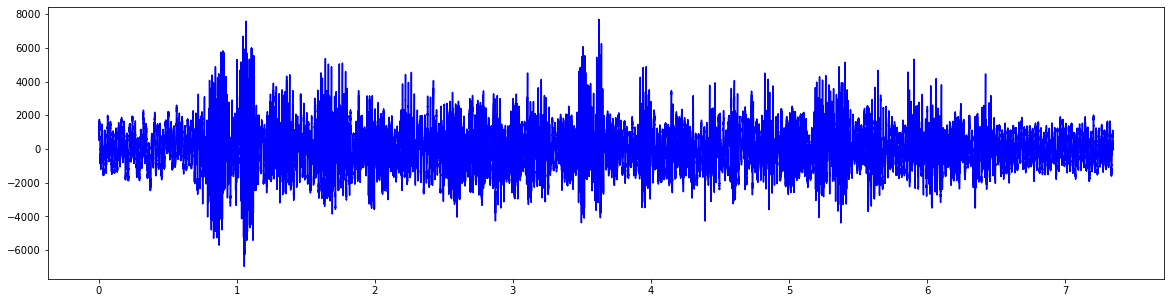

In [154]:
framerate, data = wavfile.read('record1.wav')
plt.figure(figsize=(20, 5))
plt.plot(numpy.linspace(0, len(data) / framerate, num=len(data)), data, color='blue')
plt.show()

#### Траектория основного тона (F0)

In [165]:
N = 512
Sr = round(framerate / N)
offset = int(0.25 * N)

intervals = list(more_itertools.windowed(data, n=N, step=offset))
intervals[len(intervals)-1] = [interval for interval in intervals[len(intervals) - 1] if interval != None]
intervals = [interval * numpy.hamming(len(interval)) for interval in intervals]

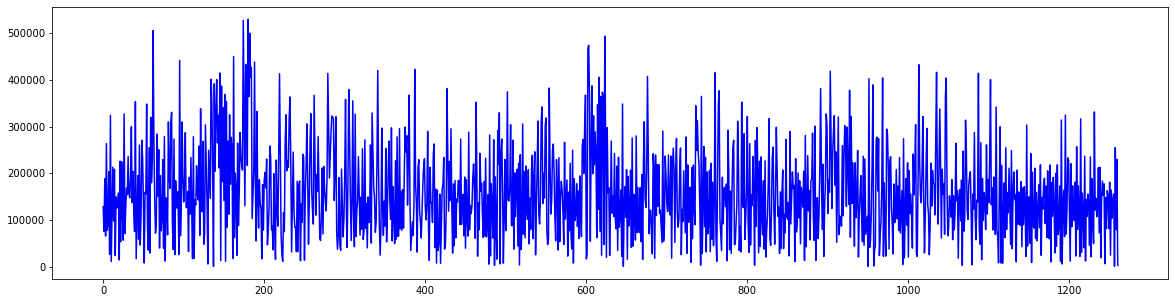

In [166]:
intervals = [fft(interval) for interval in intervals]
spectrum = [sum([segment**2 for segment in interval[:int(len(interval) / 2)]])**0.5 for interval in intervals]
spectrum = numpy.array([interval.real for interval in spectrum])

plt.figure(figsize=(20, 5))
plt.plot(spectrum, color='blue')
plt.show()

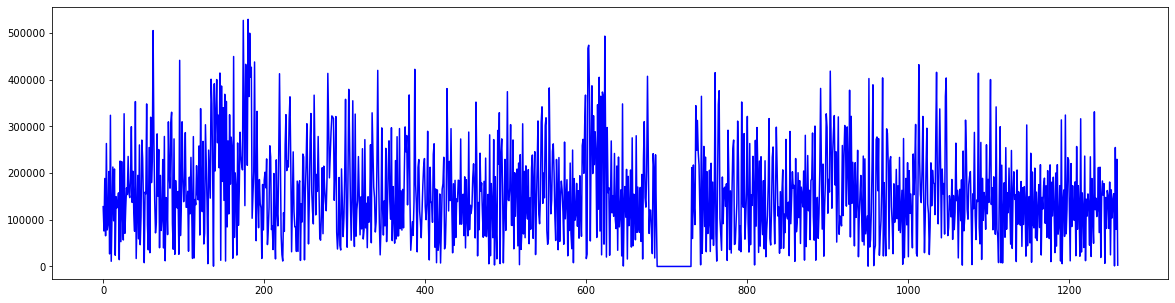

In [167]:
F0 = []
for index in range(0, len(spectrum), Sr):
    interval = numpy.array(spectrum[index : index + Sr])
    if interval.max() <= interval.mean() * 2:
        F0 += numpy.zeros(len(interval)).tolist()
    else:
        F0 += interval.tolist()

plt.figure(figsize=(20, 5))
plt.plot(F0, color='blue')
plt.show()

#### Траектория основного тона (F1, F2, F3)

In [169]:
def func(F0, factor):
    formant = []
    for index in range(0, len(F0)):
        if factor * index - 1 in range(len(F0)) and factor * index + 1 in range(len(F0)):
            maximum = max(F0[factor * index - 1], F0[factor * index + 1])
            if F0[index] > maximum * (factor * 2 + 1):
                formant.append(maximum)
            else:
                formant.append(0) 
    return formant

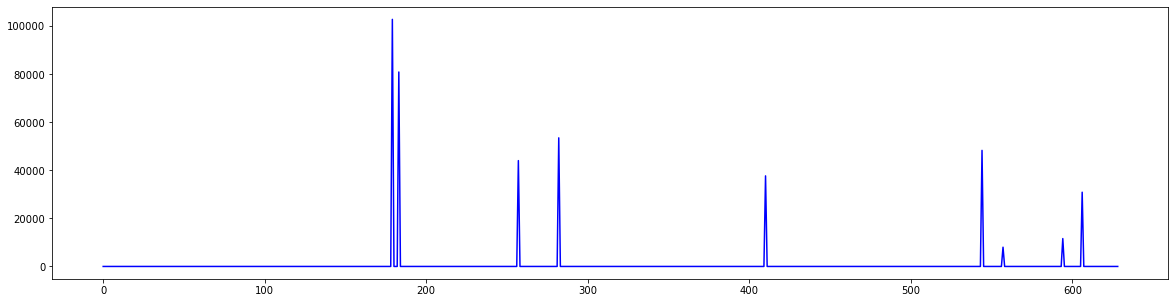

In [170]:
plt.figure(figsize=(20, 5))
plt.plot(func(F0, 2), color='blue')
plt.show()

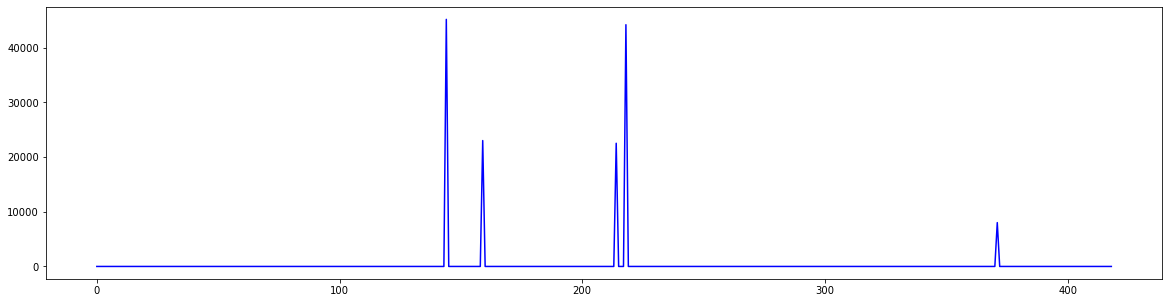

In [171]:
plt.figure(figsize=(20, 5))
plt.plot(func(F0, 3), color='blue')
plt.show()

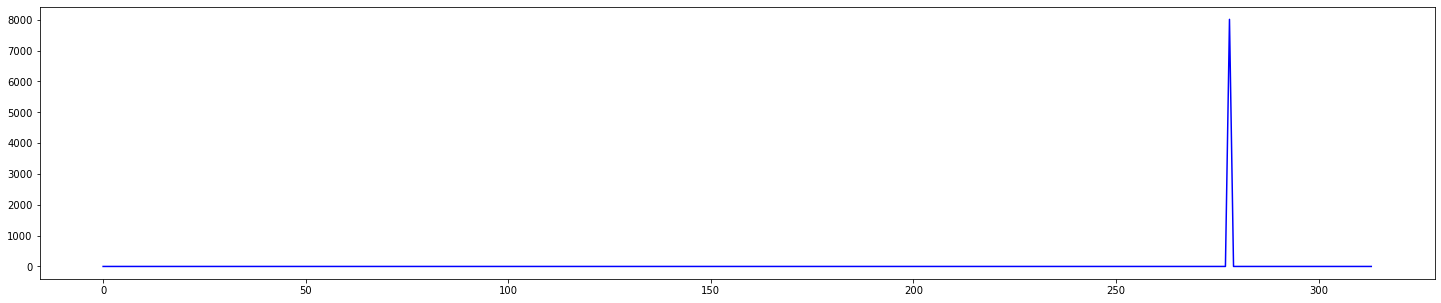

In [172]:
plt.figure(figsize=(25, 5))
plt.plot(func(F0, 4), color='blue')
plt.show()

#### Сонограмма

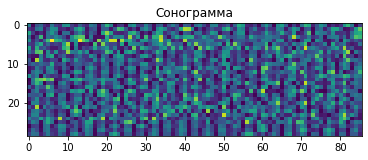

In [162]:
sonogram = [list(spectrum[index : index + Sr]) for index in range(0, len(spectrum), Sr)]

sonogram = sonogram[:-1]
sonogram = numpy.array(sonogram)
sonogram.reshape(len(sonogram), len(sonogram[0]))

plt.title('Сонограмма')
plt.imshow(sonogram)
plt.show()

### Вывод
В данной лабораторной работе было изучено дискретное преобразование Фурье, а так же построены траектории основного тона, вторая, третья и четвертая форманты и сонограмма своего голоса.